In [34]:
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [35]:
data = pd.read_csv("F:\Dataset\Iris.csv")

In [36]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [38]:
data.shape

(150, 6)

In [39]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [40]:
data.drop('Id',axis=1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<AxesSubplot:>

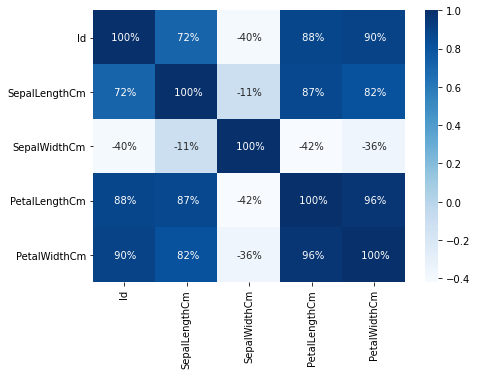

In [41]:
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(),annot=True, fmt=" .0%",cmap='Blues')

In [42]:
#Elbow Method

In [43]:
#To find the Value of K by elbow method

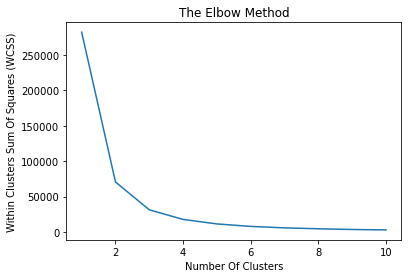

In [44]:
x= data.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans
wcss =[]

for i in range (1,11):
    kmeans = KMeans(n_clusters = i ,init = 'k-means++',
                   max_iter= 300,n_init=10,random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#ploting the k value estimated by Elbow Method

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number Of Clusters')
plt.ylabel('Within Clusters Sum Of Squares (WCSS)')
plt.show()

In [45]:
#With the help of above 'Elbow' shaped graph we can find the value of k for K-Means Clustering

In [46]:
#Using K-Means Clustring with k=3

In [47]:
kmeans = KMeans(n_clusters = 3,init='k-means++',random_state=0)
y_kmeans = kmeans.fit_predict(x)

In [48]:
#Visual Representation of different Clusters

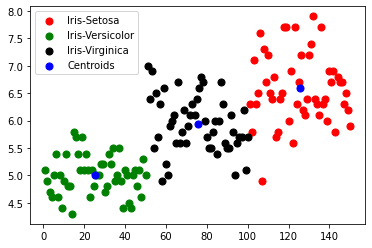

In [49]:
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1],
           s=50,c='red',label = 'Iris-Setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1],
           s=50,c='green',label = 'Iris-Versicolor')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1],
           s=50,c='black',label = 'Iris-Virginica')

#plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
           s=50,c='blue',label = 'Centroids')

plt.legend()

